<a href="https://colab.research.google.com/github/chotu259/Bhargavi/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**logistic regression.ipynb**

accuracy  96.49122807017544
entropy_loss 0.5655473123328005


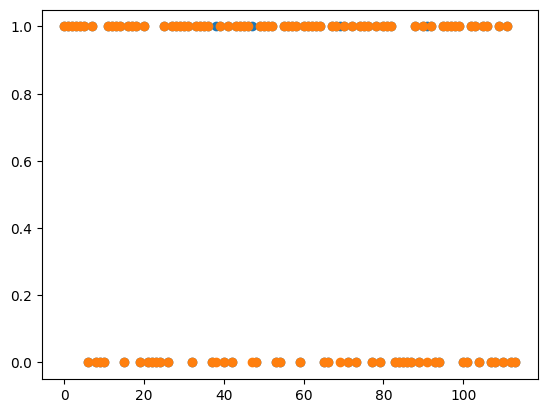

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
class LogisticRegression1():
  def __init__(self,lr,iter):
    self.lr=lr
    self.iter=iter
  def fit(self,X,Y):
    self.m,self.n=X.shape
    self.W=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y
    for i in range(self.iter):
        self.update_w()
    return self
  def update_w(self):
      Y_pred=self.predict(self.X)
      h=Y_pred-self.Y.T
      h=np.reshape(h,self.m) # this line to ensure that h has shape  self.m  that it is 1D array
      #(m=total no.of observations)
      dW=np.dot(self.X.T, h) /self.m
      db=np.sum(h)/self.m
      self.W = self.W - self.lr*dW
      self.b = self.b - self.lr* db
      return self
  def sigmoid(self,x):
      return 1/(1+np.exp(-x))
  def predict(self,X):
       Z=self.sigmoid(X.dot(self.W)+self.b)
       Y = np.where( Z > 0.5, 1, 0 )
       return Y
  def BCELoss(self,y,y_pred):
        epsilon = 1e-7  # small epsilon value to avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # clip y_pred to avoid log(0) or log(1)
        # np.clip(array, min_value, max_value) and  used to ensure that the predicted probabilities (y_pred) do not exactly reach 0 or 1

        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss
breast_cancer = datasets.load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
#print(breast_cancer)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
breast_cancer1=LogisticRegression1(lr=0.01,iter=1000)
breast_cancer1.fit(X_train,y_train)
y_predict1=breast_cancer1.predict(X_test)
c1 = np.sum(y_predict1==y_test)
c=len(y_test)
print("accuracy ",(c1/c)*100)
entropy_loss = breast_cancer1.BCELoss(y_test,y_predict1)
print("entropy_loss",entropy_loss)
plt.scatter(range(y_predict1.shape[0]),y_predict1);
plt.scatter(range(y_predict1.shape[0]),y_test);
plt.show()